<h1 style="text-align: center;">Evolución del Campo Escalar Real Auto-Gravitante</h1>

![Dialectical Matter](dialecticalmater.jpeg)

### 1 - Introducción y Estado Inicial
Las ecuaciones del campo son:
\begin{eqnarray}
 \partial_t \phi &=& \frac{\alpha}{a}\pi \\
 \partial_t \pi &=& \frac{1}{r^2}\partial_r\left(\frac{r^2\alpha\psi}{a}\right)-\alpha a\phi \\
 \partial_t \psi &=& \partial_r \left( \frac{\alpha\pi}{a} \right)
\end{eqnarray}

Mientras que las constricciones métricas son:

\begin{eqnarray}
 \frac{a'}{a} &=& \frac{1-a^2}{2r} + \frac{r}{4}\left[ \psi^2 + \pi^2 + a^2\phi^2 \right] \\
 \frac{\alpha'}{\alpha} &=& \frac{a^2-1}{2r} + \frac{r}{4}\left[ \psi^2 + \pi^2 - a^2\phi^2 \right] \\
 \partial_t a &=& \frac{1}{2} r\alpha\psi\pi 
\end{eqnarray}

La primera es constricción hamiltoniana. La segunda es la componente $(r,r)$ de EE. La tercera es la componentes $(t,r)$ de las EE y se le conoce como constricción de momento.

La relación entre las variables es la siguiente:

$$\pi = \dfrac{a}{\alpha}\partial_t \phi \qquad \psi = \partial_r \phi$$

Hay seis ecuaciones y cinco variables. Por lo que el sistema es sobre-determinado. Se escogen sólo cinco de las ecuaciones y la constricción de momento se utiliza para verificar que el sistema se está resolviendo de manera correcta.

El truco para evitar problemas con la singularidad en $r=0$ en la ecuación para $\pi$ es derivar respecto a $r^3$ en las primeras iteraciones espaciales.

$$ \partial_t \pi = 3\frac{\partial}{\partial r^3}\left(\frac{r^2\alpha\psi}{a}\right)-\alpha a\phi $$

La condición inicial se propone de la siguiente manera:

$$ \phi_0(r) = Ae^{-r^2/\sigma^2} $$
$$ \psi_0(r) = -\frac{2r}{\sigma^2}\phi(r) $$
$$ \pi_0(r) = 0 $$

Las condiciones de frontera para la métrica son:

$$a(0)=1$$
$$\alpha(\infty)=1/a(\infty)$$

El estado inicial se resolverá con Runge-Kutta ordinario para $a$ y para $\alpha$ con Runge-Kutta modificado de tal manera que se resuelva desde atrás hacia el origen de coordenadas. Ésto es posible gracias a que $a$ no depende de $\alpha$. Si este fuera el caso, tendríamos que resolverlas simultáneamente hacia adelante, lo cual requeriría una condición de frontera para $\alpha$ en el origen, lo cual no conocemos físicamente.

--------------------------------------------------------------------------------------
# <center>  Estado inicial

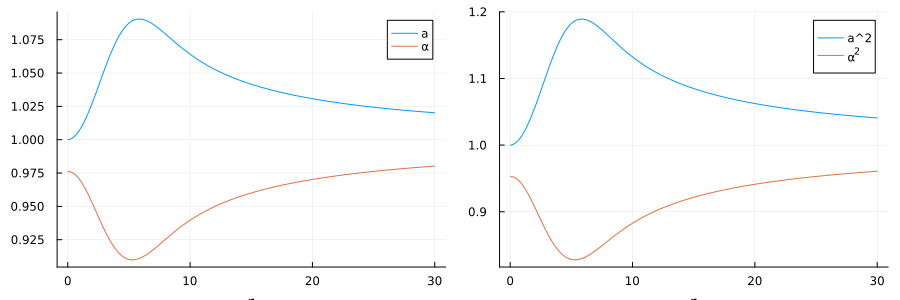

In [1]:
#--------------------------------------------------#
#                   Ejecución #1                   #
#--------------------------------------------------#
using Plots

#------------------------------#
#---Las Ecuaciones Estáticas---#
#------------------------------#

# Condición inicial propuestas para phi y psi
phi0 = (Amp,sigma,r) -> Amp * exp(-(r/sigma)^2)
psi0 = (Amp,sigma,r) -> -2*r/sigma^2 * Amp * exp(-(r/sigma)^2)

# Ecuación para a
function deq_a(a,r) # No depende de alpha :) 
    phi = phi0(0.3,5.35,r)
    psi = psi0(0.3,5.35,r)
    dln_a = (1-a^2)/(2*r) + 0.25*r*(psi^2+(a*phi)^2)
    return a * dln_a
end

# Ecuación para alpha
function deq_alpha(alpha,a,r) # Sí depende de alpha
    phi = phi0(0.3,5.35,r)
    psi = psi0(0.3,5.35,r)
    dln_alpha = (a^2-1)/(2*r) + 0.25*r*(psi^2-(a*phi)^2)
    return alpha * dln_alpha
end

#------------------------------------#
#---Solucionador RK-4 de a y alpha---#
#------------------------------------#

Nr = 1000
rf = 30
h = rf /Nr

# 1.- Ciclo para solucionar a y generar la malla

r = Float64[] # Para la malla
a = Float64[] # Albergue para migrantes, que diga! para la solución de a :D

r0 = h # Inicialización de la variable r
a0 = 1.0 # Planitud espacial en el origen

for i in 1:Nr # Este ciclo soluciona a
    
    push!(r, r0)
    push!(a, a0)
    
    r0 += h
    k1 = h * deq_a(a0, r0)
    k2 = h * deq_a(a0 + 0.5*k1, r0+0.5*h)
    k3 = h * deq_a(a0 + 0.5*k2, r0+0.5*h)
    k4 = h * deq_a(a0 + k3, r0+h)
    
    a0 += (k1 + 2*k2 + 2*k3 + k4)/6
end

# 2.- Ciclo para resolver alpha (Runge-Kutta de reversa, mami :v)

lalpha_r = Float64[] # Aquí albergamos la solución  de alpha al revés

alpha0 = 1.0/a[end] # Inicialización de alpha
r0 = rf
    
for a0 in reverse(a)
    push!(lalpha_r, alpha0)
    r0 -=h
    k1=h * deq_alpha(alpha0, a0, r0)
    k2=h * deq_alpha(alpha0+0.5*k1, a0, r0+0.5*h)
    k3=h * deq_alpha(alpha0+0.5*k2, a0, r0+0.5*h)
    k4=h * deq_alpha(alpha0+k3, a0, r0+h)
        
    alpha0 -= (k1+2*k2+2*k3+k4)/6
end

alpha = reverse(lalpha_r)

# Se definen a y alpha al cuadrado porque Siddhartha dice.

a_cuadrado = [k^2 for k in a]
alpha_cuadrado = [k^2 for k in alpha]

# Graficación
plt_static = plot(layout=(1, 2), size=(900, 300))

plot!(plt_static[1], r, a, xlabel="r", label="a")
plot!(plt_static[1], r, alpha, xlabel="r", label="\u03B1")

plot!(plt_static[2], r, a_cuadrado, xlabel="r", label=raw"a^2")
plot!(plt_static[2], r, alpha_cuadrado, xlabel="r", label=raw"\alpha^2")

display(plt_static)

### 2 - Masa, $\sigma$, Compacidad y demás variables

La relación entre de estas funciones con la masa $m(r)$ y la función $\sigma(r)$ utilizada por Daka, se obtiene de comparar las siguientes definiciones:

$$ ds^2 = -\alpha^2(r)dt^2 + a^2dr^2 +r^2 d\Omega^2 $$
$$ ds^2 = -N(r)\sigma(r)^2(r)dt^2 + \dfrac{dr^2}{N(r)} +r^2 d\Omega^2 $$

$$ N(r) := 1 - \dfrac{2m(r)}{r} $$
$$ \sigma(r) := \alpha(r)a(r) $$

$$ m(r) = \dfrac{r}{2}\left( 1 - \dfrac{1}{a(r)^2} \right) $$

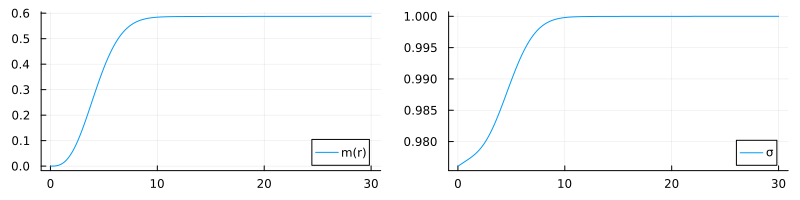

In [2]:
#--------------------------------------------------#
#                   Ejecución #2                   #
#--------------------------------------------------#

#--------------------------------#
#---Cálculo de la Masa y Sigma---#
#--------------------------------#
m = [i/2*(1-1/j^2) for (i, j) in zip(r, a)] # Masa
sigma = [i*j for (i, j) in zip(a, alpha)] # Sigma        
        
# Graficación
plt_masa = plot(layout=(1, 2), size=(800, 200))

plot!(plt_masa[1], r, m, xlabel="r", label=raw"m(r)")
plot!(plt_masa[2], r, sigma, xlabel="r", label=raw"\sigma")

display(plt_masa)

### 3 - Condiciones de Frontera

Para todo tiempo, no es necesario imponer una condición de frontera en $r=0$ ni en $r=r_N$ a $\phi$, ya que el ciclo que la soluciona puede seguirse hasta las fronteras. 

$$\phi^n_j = \phi^{n-1}_j + \Delta t \dfrac{\alpha^{n-1}_j}{a^{n-1}_j} \pi^{n-1}j $$

Para las otras ecuaciones, la derivada en $r$ introduce la imposibiidad de calcular las funciones en $r=0$ y $r=r_N$ pues necesitaríamos puntos fantasma. Así que a $\pi$ y $\psi$ se les impone condiciones de frontera. Primero, para $r=0$, se considera $\psi$ impar y $\pi$ par. De éste modo:

$$\Rightarrow \psi(0)=-\psi(1)$$
$$\Rightarrow \pi(0)=\pi(1)$$

Por otro lado, una onda esférica $f(r,t)$ debe tener la forma:

$f(r,t)=\dfrac{u(r-t)}{r}$. Con lo que debe cumplir la siguiente ecuación:

$\partial_r f + \partial_t f + \dfrac{f}{r}=0$

Para la frontera exterior $r=r_N$ se supone $\phi$ es una onda esférica saliente, así que cumple la ecuación:

$\psi=-\pi-\dfrac{\phi}{r}$

Lo mismo para $\pi$:

$\partial_r \pi + \partial_t \pi + \dfrac{\pi}{r}=0$

Mediante derivadas ladeadas a la derecha en $r$ y en $t$, se puede discretizar esta última ecuación:

$\dfrac{\pi^n_j-\pi^n_{j-1}}{\Delta r}+\dfrac{\pi^n_j-\pi^{n-1}_{j}}{\Delta t}+\dfrac{\pi^n_j}{r_j}=0 \Rightarrow \pi^n_j=\left( \pi^n_{j-1}+\dfrac{\Delta r}{\Delta t}\pi^{n-1}_j \right) / \left( 1+ \dfrac{\Delta r}{\Delta t}+\dfrac{\Delta r}{r_j} \right) $

Entonces, las condiciones de frontera en $r=r_N$ son:

$$\pi^n_N=\left( \pi^n_{N-1}+\dfrac{\Delta r}{\Delta t}\pi^{n-1}_N \right) / \left( 1+ \dfrac{\Delta r}{\Delta t}+\dfrac{\Delta r}{r_N} \right)$$

Y volvemos a la ecuación de $\phi$ para encontrar la condición de $\psi$, la cual queda así:

$$\psi^n_N=-\pi^n_N-\dfrac{\phi^n_N}{r_N}$$

La condición  de frontera que utiliza el Compact en $r=r_N$ para $\pi$ se obtiene con otras aproximaciones a la derivada.

### 4 - Discretización de las Ecuaciones

Tenemos las condiciones iniciales para el tiempo $t=0$ para todo $x$:

$$ \phi^0_j, \quad \pi^0_j, \quad \psi^0_j, \quad a^0_j, \quad \alpha^0_j $$

La discretización de las ecuaciones se da de la siguiente manera:

\begin{equation}\tag{1}
\phi^{n+1}_j = \phi^{n}_j +\Delta t \left[ \dfrac{\alpha^{n}_{j}}{a^{n}_{j}} \pi^{n}_{j} \right]
\end{equation}

\begin{equation}\tag{2}
\psi^{n+1}_j = \psi^{n}_j +\Delta t \dfrac{1}{2\Delta r}\left[ \dfrac{\alpha^{n}_{j+1}}{a^{n}_{j+1}}\pi^{n}_{j+1} - \dfrac{\alpha^{n}_{j-1}}{a^{n}_{j-1}}\pi^{n}_{j-1} \right]
\end{equation}

\begin{equation}\tag{3}
\pi^{n+1}_j = \pi^{n}_j +\Delta t * \left[\dfrac{3}{(r_{j+1})^3 - (r_{j-1})^3 }\left[ \dfrac{\alpha^{n}_{j+1}}{a^{n}_{j+1}} \left(r_{j+1}\right)^2\psi^{n}_{j+1} - \dfrac{\alpha^{n}_{j-1}}{a^{n}_{j-1}} \left(r_{j-1}\right)^2\psi^{n}_{j-1} \right] -a^{n}_j\alpha^{n}_j\phi^{n}_j\right]
\end{equation}

\begin{equation}\tag{4}
\pi^{n+1}_j = \pi^{n}_j +\Delta t * \left[ \dfrac{1}{ 2\Delta r (r_j)^2 }\left[ \dfrac{\alpha^{n}_{j+1}}{a^{n}_{j+1}} \left(r_{j+1}\right)^2\psi^{n}_{j+1} - \dfrac{\alpha^{n}_{j-1}}{a^{n}_{j-1}} \left(r_{j-1}\right)^2\psi^{n}_{j-1} \right]-a^{n}_j\alpha^{n}_j\phi^{n}_j \right]
\end{equation}

Si acaso $r^n_{j-1} = 0$ o muy cercano a $0$ no habría problema porque entra el truco de derivar respecto a $r^3$ y el denominador no explota.

\begin{equation}\tag{5}
a^n_{j+1}=a^n_{j}+\Delta r * a^n_j\left[ \dfrac{1-(a^n_j)^2}{2r_j}+\dfrac{r_j}{4} \left[ (\psi^n_j)^2+(\pi^n_j)^2 + (a^n_j\phi^n_j)^2 \right] \right]
\end{equation}

\begin{equation}\tag{6}
\alpha^n_{j-1}=\alpha^n_{j}-\Delta r * \alpha^n_j\left[ \dfrac{(a^n_j)^2-1}{2r_j}+\dfrac{r_j}{4} \left[ (\psi^n_j)^2+(\pi^n_j)^2 - (a^n_j\phi^n_j)^2 \right] \right]
\end{equation}

Estas dos últimas ecuaciones pueden resolverse también con Runge-Kutta pero para ilustrar puse Euler. En cada paso temporal se resuelven.

\begin{equation}\tag{7}
adot^{n+1}_{j}=\dfrac{a^{n+1}_j-a^n_j}{\Delta t}-\frac{1}{2}r_j\alpha^n_j\psi^n_j\pi^n_j
\end{equation}

Esta última ecuación es un grano la nalga pero debe verificarse que sea cero para asegurarnos de que el sistema se está resolviendo correctamente:

### 5 - Pseudo-Código

El ciclo temporal envuelve a todos los ciclos espaciales. Lo primero que se me ocurre es definir a todas las funciones como matrices. Esa tal vez sería la manera de llevar a cabo una generalización para ecuaciones con más variables espaciales. Sin embargo no parece ser una opción a la hora de hacer el balance de memoria.

Para ahorrar memoria se utilizará un truco sencillo en la ilustración del ciclo principal mostrado a continuación:

1) Se comienza enunciando las condiciones iniciales, es decir a $t=0$:

$\phi = [...] \qquad \psi = [...] \qquad \pi = [...] $

$ a = [...] \qquad \alpha = [...] $

Se definen además los arreglos para las fuentes:

$ s\phi = [...0...] \qquad s\psi = [...0...] \qquad s\pi = [...0...] $

Y no nos olvidemos de los arreglos para los pasos previos y de la molesta $adot$:

$ \phi_p = [...0...] \qquad \psi_p = [...0...] \qquad \pi_p = [...0...] $

$ a_p = [...0...] \qquad adot = [...0...]$

todos como arreglos de $N_r$ ceros

2) Ciclo principal de evolución:

$t = 0$

for $i$ in $1:Nt$

    --------Fuentes--------

$\qquad$ for $j$ in $1:Nr$

$\qquad \qquad s\phi[j] = ...$

$\qquad$  end

$\qquad$ for $j$ in $2:Nr-1$

$\qquad \qquad s\psi[j] = ...$

$\qquad$  end

$\qquad$ for $j$ in $2:11$

$\qquad \qquad s\pi[j] = ...$

$\qquad$  end

$\qquad$ for $j$ in $11:Nr-1$

$\qquad \qquad s\pi[j] = ...$

$\qquad$  end

    --------Truco del paso previo--------
    
$\qquad \phi_p = \phi \qquad \psi_p = \psi \qquad \pi_p = \pi$

$\qquad a_p = a $

    --------Evolución--------
    
$\qquad$ for $j$ in $1:Nr$

$\qquad \qquad \phi[j] = \phi_p[j] + \Delta t * s\phi[j]$

$\qquad$  end

$\qquad$ for $j$ in $2:Nr-1$

$\qquad \qquad \psi[j] = \psi_p[j] + \Delta t * s\psi[j]$

$\qquad \qquad \pi[j] = \pi_p[j] + \Delta t * s\pi[j]$

$\qquad$  end

    --------Condiciones de frontera--------
$\qquad \pi[1]=\pi[2]$

$\qquad \psi[1]=-\psi[2]$

$\qquad \pi[N_r]= \left( \pi[Nr-1] + \dfrac{\Delta r}{\Delta t} \pi_p[Nr] \right) /\left(1+\dfrac{\Delta r}{\Delta t}+\dfrac{\Delta r}{r_N}\right) $

$\qquad \psi[N_r]= -\pi[N_r]-\dfrac{\phi[Nr]}{r_N}$

    --------Métrica--------
    
$\qquad a[1]=1$

$\qquad$ for $j$ in $1:Nr-1$

$\qquad \qquad a[j+1] = a[j] + \Delta r * a[j]\left[ \dfrac{1-a[j]^2}{2r_j} +\dfrac{r_j}{4} \left(\psi[j]^2+\pi[j]^2+(a_j\phi[j])^2\right) \right] $

$\qquad$  end

$\qquad \alpha[N_r]=\dfrac{1}{a[N_r]}$

$\qquad$ for $j$ in $\text{reverse}(2:Nr)$

$\qquad \qquad \alpha[j-1] = \alpha[j] - \Delta r * \alpha[j]\left[ \dfrac{a[j]^2-1}{2r_j} +\dfrac{r_j}{4} \left(\psi[j]^2+\pi[j]^2-(a[j]\phi[j])^2\right) \right] $

$\qquad$  end

$\qquad$ for $j$ in $1:Nr$

$\qquad \qquad adot[j] = \dfrac{a[j]-a_p[j]}{\Delta t} -\dfrac{1}{2} r_j\alpha[j]\psi[j]\pi[j] $

$\qquad$  end

$\qquad t = t + \Delta t $

end

Y, primeramente dios, ésto tiene que jalar.

# <center>  Inicialización

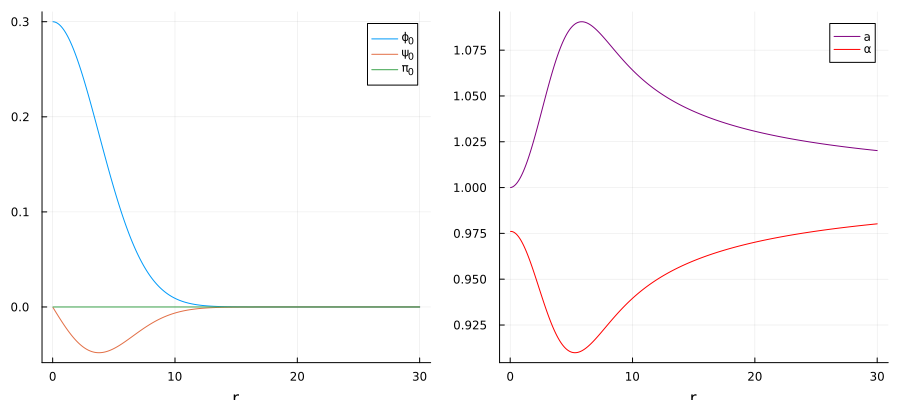

In [3]:
#--------------------------------------------------#
#                   Ejecución #3                   #
#--------------------------------------------------#

#----Parámetros del dominio----------------------------
Nt = 1000
courant = 0.2
dr = h
dt = courant * dr

# 0) Malla espacial: r---------------------------------

# 1F) Condición inicial para phi------------------------
phi = Float64[]
for i in r
    push!(phi,phi0(0.3,5.35,i))
end

# 2F) Condición inicial para psi------------------------
psi = Float64[]
for i in r
    push!(psi,psi0(0.3,5.35,i))
end

# 3F) Condición inicial para pi-------------------------
pi = zeros(Nr)

# 1M) Condición inicial para a: a----------------------

# 2M) Condición inicial para alpha: alpha---------------

# 3M) Condición inicial para la molesta adot---------------
adot = zeros(Nr)

#----Arreglos para las fuentes -----------
s_phi = zeros(Nr)
s_psi = zeros(Nr)
s_pi = zeros(Nr)

#----Arreglos para los pasos previos -----------
phi_p = zeros(Nr)
psi_p = zeros(Nr)
pi_p = zeros(Nr)

a_p = zeros(Nr)

# A continuación se grafican los datos iniciales para verificar su correcta implementación

plt_initial = plot(layout = (1, 2), size = (900, 400))


plot!(plt_initial[1], r, phi, xlabel=raw"r", label = raw"\varphi_0")
plot!(plt_initial[1], r, psi, xlabel=raw"r", label = raw"\psi_0")
plot!(plt_initial[1], r, pi, xlabel=raw"r", label = raw"\pi_0")

plot!(plt_initial[2], r, a, xlabel=raw"r", label = "a", linecolor=:purple)
plot!(plt_initial[2], r, alpha, xlabel="r", label=raw"\alpha", linecolor=:red)

display(plt_initial)

--------------------------------------------------------------------------------------
# <center>  Ciclo Principal de Evolución

In [4]:
# Léase con voz de Mickey Mouse: "Esta es una herramienta que nos ayudará más tarde"
#Utilizaré estas funciones para resolver las constricciones métricas de manera más sencilla

# Ecuación para a
function deq_a_evolve(phi, psi, pi, a, r) # Sigue sin depender de alpha :) 
    dln_a = (1-a^2)/(2*r) + 0.25*r*(psi^2 + pi^2 + (a*phi)^2)
    return a * dln_a
end

# Ecuación para alpha
function deq_alpha_evolve(phi, psi, pi, alpha, a, r) # Sí depende de alpha
    dln_alpha = (a^2-1)/(2*r) + 0.25*r*(psi^2 + pi^2 - (a*phi)^2)
    return alpha * dln_alpha
end

deq_alpha_evolve (generic function with 1 method)

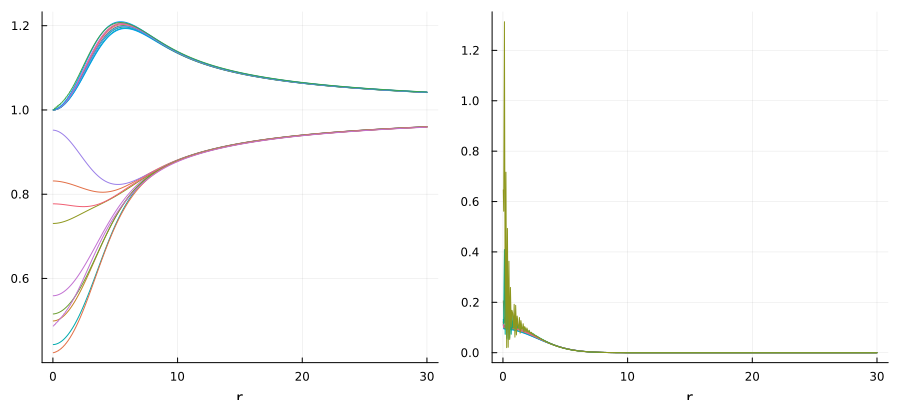

In [5]:
#--------------------------------------------------#
#                   Ejecución #4                   #
#--------------------------------------------------#
using DelimitedFiles
#--------------------------------#
#---Archivos de Almacenamiento---#
#--------------------------------#
datos_phi = []
datos_a = []
datos_alpha = []
datos_adot = []

# Aquí mero inicia el Ciclo Principal de Evolución

t = 0.0

# Crear la figura inicial fuera del ciclo
plt_evolve = plot(layout=(1, 2), xlabel="r", size=(900, 400))

for i in 1:Nt 
    
    #------------------------#
    #---Escritura de Datos---#
    #------------------------#
    if mod(i, 30) == 0
        for j in 1:Nr
            push!(datos_phi, [t, r[j], phi[j]])
            push!(datos_a, [t, r[j], a[j]])
            push!(datos_alpha, [t, r[j], alpha[j]])
            push!(datos_adot, [t, r[j], adot[j]])
        end
    end
    
    #----------------------#
    #---Fuentes de Ortiz---#
    #----------------------#
    
    #---Para phi----------------------------
    for j in 1:Nr
        s_phi[j] = alpha[j]*pi[j]/a[j]
    end
    #---Para psi----------------------------
    for j in 2:Nr-1
        s_psi[j] = 0.5/dr *(alpha[j+1]*pi[j+1]/a[j+1]- alpha[j-1]*pi[j-1]/a[j-1])
    end
    
    #---Para pi------------Incluye el truco de derivar respecto a r³
    for j in 2:11
        s_pi[j] = 3.0/(r[j+1]^3 - r[j-1]^3)*(alpha[j+1]*r[j+1]^2*psi[j+1]/a[j+1] 
                    - alpha[j-1]*r[j-1]^2*psi[j-1]/a[j-1])- a[j]*alpha[j]*phi[j]
    end
    
    for j in 12:Nr-1
        s_pi[j] = 0.5/dr *(alpha[j+1]*r[j+1]^2*psi[j+1]/a[j+1] 
            - alpha[j-1]*r[j-1]^2*psi[j-1]/a[j-1])/r[j]^2 - a[j]*alpha[j]*phi[j]
    end
    
    #-----------------------------#
    #---Truco del Pasito Perrón---#
    #-----------------------------#
    
    phi_p = phi
    psi_p = psi
    pi_p = pi
    
    a_p = a
    
    #-----------------------------#
    #---Evolución de los campos---#
    #-----------------------------#
    
    # En este condicional se programa el método de ICN
    
    if i<50
        dtw = 0.5*dt
    else
        dtw = dt
    end

    
    #---- Evolución de phi-------------
    for j in 1:Nr
        phi[j] = phi_p[j]+dtw*s_phi[j]
    end
    
    #---- Evolución de psi y pi-------------
    
    for j in 2:Nr-1
        psi[j] = psi_p[j] + dtw*s_psi[j]
        pi[j] = pi_p[j] + dtw*s_pi[j]
    end
    
    #-----------------------------#
    #---Condiciones de Frontera---#
    #-----------------------------#
    
    psi[1] = -psi[2] # Julia identa a partir de 1
    pi[1] = pi[2]
    
    # Mi Condición
    #fac = 1/(1+(dr/dt)+(dr/rf))
    #pi[Nr] = (pi[Nr-1]+(dr/dt)*pi_p[Nr])*fac
    
    # Condición del Compact
    dtfac = dtw/dr
    aux = dtw/(r[Nr] + r[Nr-1])
    
    pi[Nr] = (pi[Nr-1]*(dtfac - 1.0 - aux)
            + pi_p[Nr]*(1.0 - dtfac - aux)
            + pi_p[Nr-1]*(1.0 + dtfac - aux))/(1.0 + dtfac + aux)
    
    psi[Nr] = -pi[Nr]-phi[Nr]/rf

    #-----------------------------#
    #---Constricciones Métricas---#
    #-----------------------------#
    a[1]=1.0
    
    for j in 1:Nr-1 # Este ciclo soluciona a
        k1 = dr*deq_a_evolve(phi[j], psi[j], pi[j], a[j], r[j])
        k2 = dr*deq_a_evolve(phi[j], psi[j], pi[j], a[j] + 0.5*k1, r[j] + 0.5*dr)
        k3 = dr*deq_a_evolve(phi[j], psi[j], pi[j], a[j] + 0.5*k2, r[j] + 0.5*dr)
        k4 = dr*deq_a_evolve(phi[j], psi[j], pi[j], a[j] + k3, r[j] + dr)
        
        a[j+1] = a[j] + (k1 + 2*k2 + 2*k3 + k4)/6
    end
    
    alpha[Nr] = 1/a[Nr]

    
    for j in reverse(2:Nr)
        k1 = dr * deq_alpha_evolve(phi[j], psi[j], pi[j], alpha[j], a[j], r[j])
        k2 = dr * deq_alpha_evolve(phi[j], psi[j], pi[j], alpha[j]+ 0.5*k1, a[j], r[j] + 0.5*dr)
        k3 = dr * deq_alpha_evolve(phi[j], psi[j], pi[j], alpha[j]+ 0.5*k2, a[j], r[j] + 0.5*dr)
        k4 = dr * deq_alpha_evolve(phi[j], psi[j], pi[j], alpha[j]+ k3, a[j], r[j] + dr)
        
        alpha[j-1] = alpha[j] - (k1 + 2*k2 + 2*k3 + k4)/6
    end
    
    #---- La molesta adot -------------
    for j in 1:Nr-1
        adot[j] = (a[j]-a_p[j])/dt - 0.5*r[j]*alpha[j]*psi[j]*pi[j]
    end
    
    #----------------------#
    #---Escalar de Ricci---#
    #----------------------#
    
    #---- Calculamos la derivada de a -------------
    a_prima = Float64[]
    
    for i in 1:Nr
        if i == 1
            aprima = (a[2] - a[1]) / dr
            push!(a_prima, aprima)
        elseif 2 ≤ i ≤ Nr-1
            aprima = (a[i+1] - a[i-1]) / (2 * dr)
            push!(a_prima, aprima)
        else
            aprima = (a[end] - a[end-1]) / dr
            push!(a_prima, aprima)
        end
    end
    
    ricci = [2*(-j+j^3+2*i*k)/(i^2*j^3) for (i,j,k) in zip(r, a, a_prima)]
        
        #-2/(i*j)^2+2/i^2+4*k/(i*j^3)
    
    #---- a² y alpha²-------------
    
    a_sqrt = [k^2 for k in a]
    alpha_sqrt = [k^2 for k in alpha]
    
    #-----------------------------#
    #---Visualización de Datos---#
    #-----------------------------#
    
    impresiones = 100
    
    if mod(i, impresiones) == 0
        plot!(plt_evolve[1], r, a_sqrt, label = false)
        plot!(plt_evolve[1], r, alpha_sqrt, label = false)
        plot!(plt_evolve[2], r, ricci, label = false)
        
    end
    
    t += dt # Y ya sólo actualizamos el tiempo
end

display(plt_evolve)

writedlm("phi.dat", datos_phi)
writedlm("a.dat", datos_a)
writedlm("alpha.dat", datos_alpha)
writedlm("adot.dat", datos_adot)